In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import cv2

(350, 350, 3)


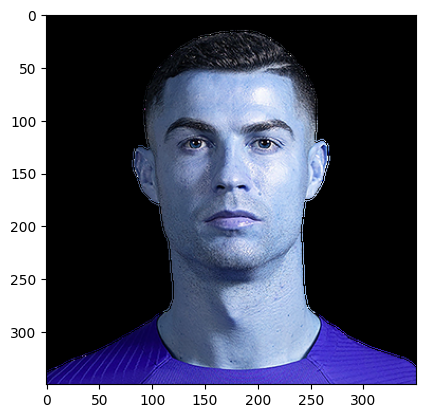

In [2]:
image = cv2.imread('Dataset/CristianoRonaldo/885.vresize.350.350.medium.14.png')
print(image.shape)
plt.imshow(image)

In [3]:
face_cascade = cv2.CascadeClassifier('opencv/haarcascade_frontalface_default.xml')
left_eye_cascade = cv2.CascadeClassifier('opencv/haarcascade_lefteye_2splits.xml')
right_eye_cascade = cv2.CascadeClassifier('opencv/haarcascade_righteye_2splits.xml')